# Lesson 6.5

## Load Data

In [18]:
# Load the data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Iris.csv")
print(data.head())

## Create training and testing sets
## y = Species
Y = data.iloc[:,5]

## x = pedal and sepal widths and lengths
X = data.iloc[:,1:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Goal: Use data to find Species
- Supervised because we have the Species in our dataset
- Classification because the data is categorical


# Decision Tree:

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- class: Iris-virginica



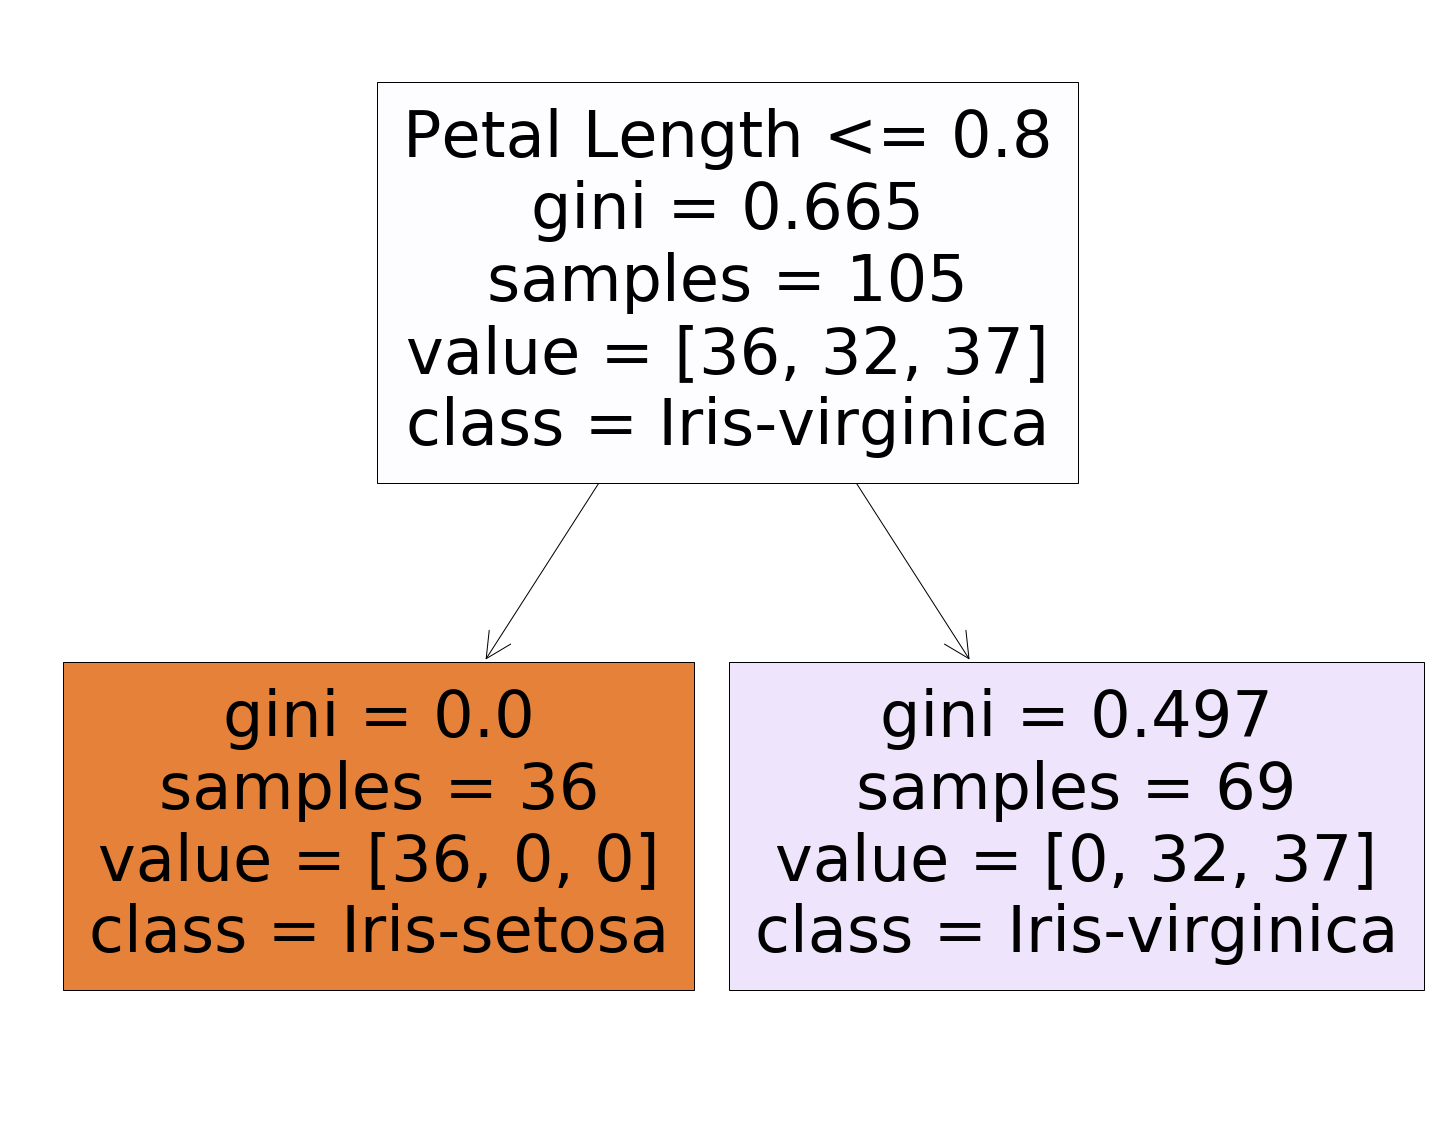

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

model = DecisionTreeClassifier(max_depth=1)
clf = model.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
plt = tree.plot_tree(clf,feature_names=["Sepal Width", "Sepal Length", "Petal Width", "Petal Length"],  class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],filled=True)

r = export_text(clf)
print(r)

In [33]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.00      0.00      0.00        18
 Iris-virginica       0.42      1.00      0.59        13

       accuracy                           0.60        45
      macro avg       0.47      0.67      0.53        45
   weighted avg       0.43      0.60      0.48        45

Report Matrix:
 [[14  0  0]
 [ 0  0 18]
 [ 0  0 13]]
Accuracy: 0.6


C:\Users\cassy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cassy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cassy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



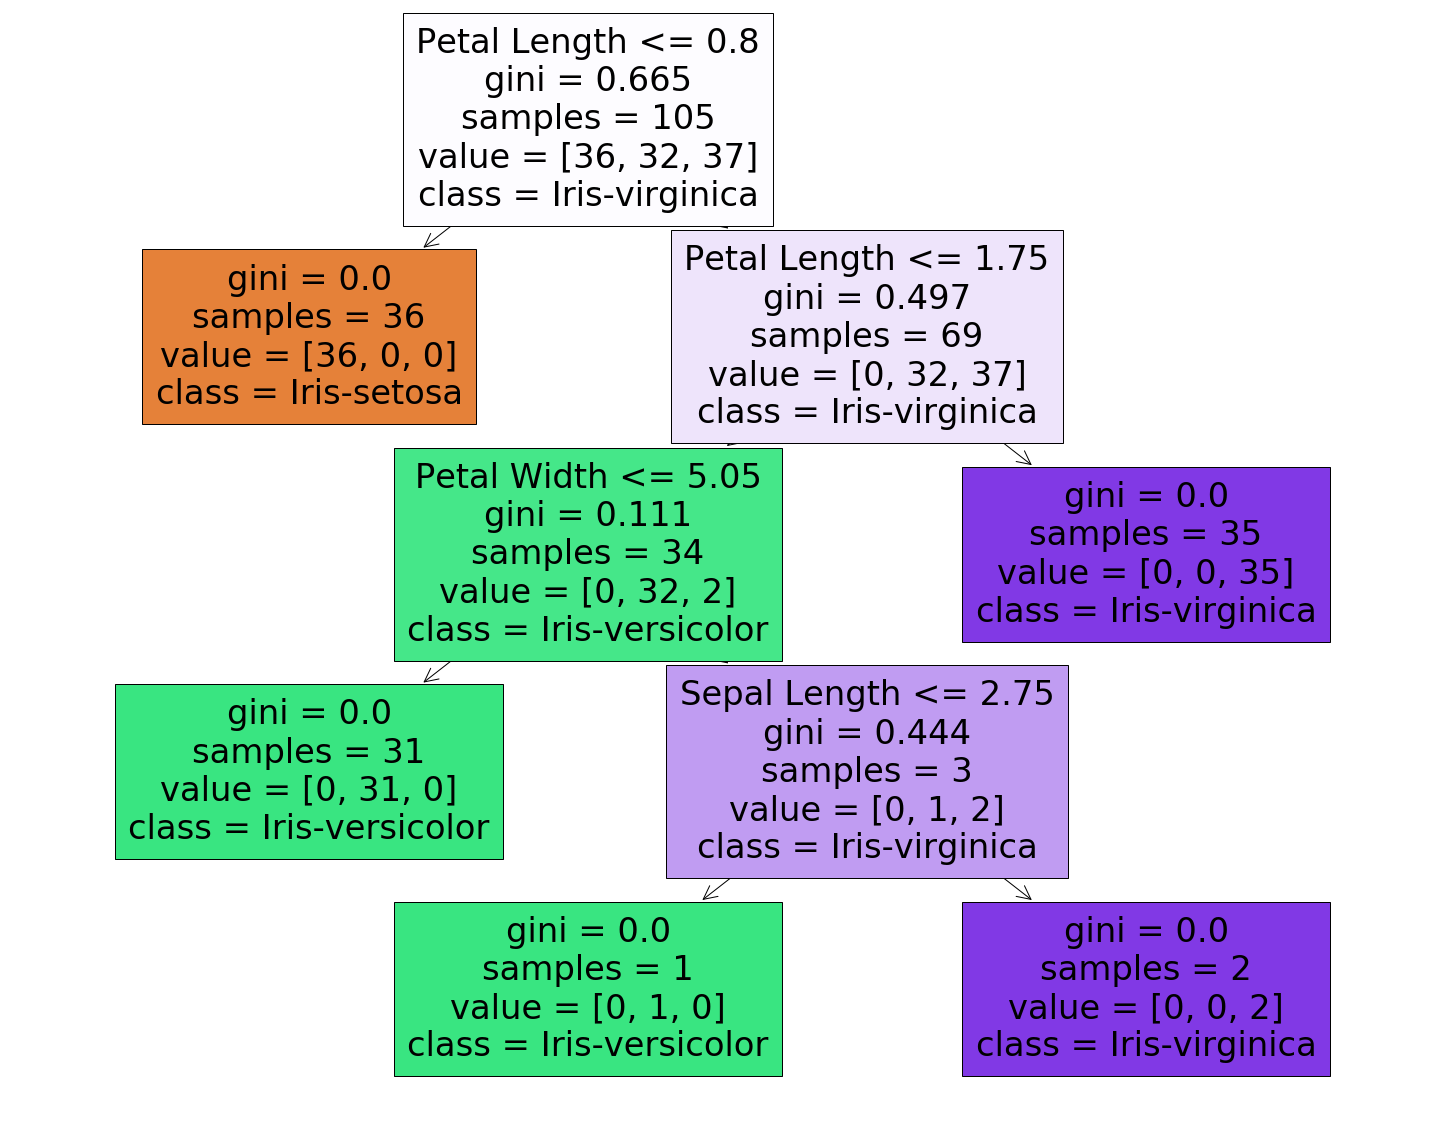

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

model = DecisionTreeClassifier(max_depth=5)
clf = model.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
plt = tree.plot_tree(clf,feature_names=["Sepal Width", "Sepal Length", "Petal Width", "Petal Length"],  class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],filled=True)

r = export_text(clf)
print(r)

### Evaluating Model's Performance

In [35]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.91        45
      macro avg       0.92      0.90      0.91        45
   weighted avg       0.91      0.91      0.91        45

Report Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  3 10]]
Accuracy: 0.9111111111111111


# Nearest Neighbours:

In [21]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5,metric = "euclidean")
clf = model.fit(X_train, y_train)

### Evaluating Model's Performance

In [22]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.94      0.92        18
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45

Report Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  2 11]]
Accuracy: 0.9333333333333333


# Naive Bayes:

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Evaluating Model's Performance

In [24]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.91      0.77      0.83        13

       accuracy                           0.91        45
      macro avg       0.92      0.90      0.91        45
   weighted avg       0.91      0.91      0.91        45

Report Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  3 10]]
Accuracy: 0.9111111111111111


# LDA:

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Evaluating Model's Performance

In [26]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Report Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Accuracy: 0.9555555555555556


# SVM:

In [27]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X_train, y_train)

SVC(gamma='auto')

### Evaluating Model's Performance

In [28]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Report Matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy: 0.9777777777777777


# Cross Validation

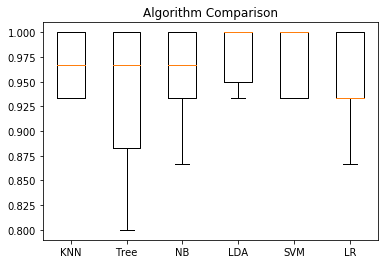

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species']
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier(max_depth=4)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()